In [4]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [5]:
# Carica il corpus 20 Newsgroups
newsgroups = fetch_20newsgroups(
    subset='all', remove=('headers', 'footers', 'quotes'))


In [6]:
# Estrai i sostantivi dai documenti e crea il corpus
stop_words = set(stopwords.words('english'))
corpus = []
for document in newsgroups.data:
    words = word_tokenize(document)
    words = [word.lower() for word in words if word.isalpha()
             and word.lower() not in stop_words]
    tagged_words = pos_tag(words)
    nouns = [word for word, pos in tagged_words if pos == 'NN']
    corpus.append(nouns)


In [7]:
# Creazione del dizionario e del corpus in formato bag-of-words
dictionary = Dictionary(corpus)
corpus_bow = [dictionary.doc2bow(doc) for doc in corpus]


In [8]:
# Test di diversi valori di k (num. di topics)
k_values = [5, 10, 15, 20, 25, 30, 40, 50, 75, 100, 150]
coherence_scores = []

for k in k_values:
    lda_model = LdaModel(corpus_bow, num_topics=k, id2word=dictionary)
    coherence_model = CoherenceModel(
        model=lda_model, texts=corpus, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    print(f"Number of topics: {k}, Coherence Score: {coherence_score}")


Number of topics: 5, Coherence Score: 0.6719101934568121
Number of topics: 10, Coherence Score: 0.5865254392400814
Number of topics: 15, Coherence Score: 0.6113226713356096
Number of topics: 20, Coherence Score: 0.579921181654831
Number of topics: 25, Coherence Score: 0.5630775343125819
Number of topics: 30, Coherence Score: 0.5561918687234233
Number of topics: 40, Coherence Score: 0.526146437113943
Number of topics: 50, Coherence Score: 0.5032649191253139
Number of topics: 75, Coherence Score: 0.4754775963789916
Number of topics: 100, Coherence Score: 0.4769912181866789
Number of topics: 150, Coherence Score: 0.468125602669031


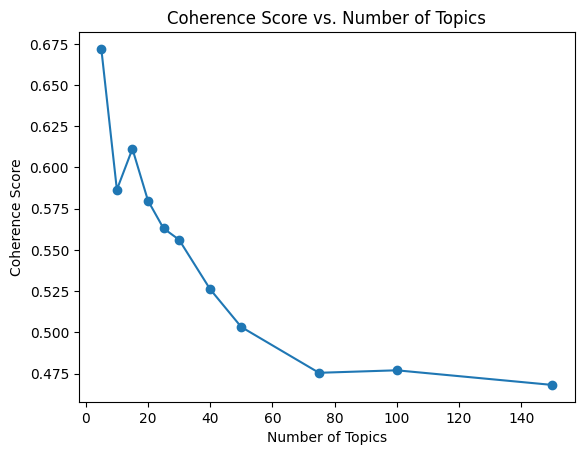

In [9]:
# Plot dei risultati
plt.plot(k_values, coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs. Number of Topics')
plt.show()
